Done watching section on Workflows in PyTorch, bascially creating a PyTorch model and doing some sort of linear regression task.

Now I will be using a sample dataset to test my knowledge, yes it does have some added compexity but that's what makes it really fun.

In [1]:
# Import needed libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Plotting plotting style
sns.set(
    style="whitegrid",
    palette="pastel",
    font_scale=1.2
)

# Improve figure quality with DPI (dots per inch) for sharper output
plt.rcParams["figure.dpi"] = 100
plt.rcParams["savefig.dpi"] = 300

# Additional settings for titles and labels
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["legend.fontsize"] = 12

# Import scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import PyTorch
import torch
from torch import nn

print(torch.__version__)

2.5.0


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/muhammadanas0716/Machine-Learning-101/refs/heads/main/Deep%20Learning%20Course%20PyTorch/Synthetic%20car%20data.csv")

df.head()

,engine_size,horsepower,weight,age,fuel_efficiency,price
0,2.810890,155.539879,1785.117051,18,10.816477,39456.75521
1,4.827500,262.570284,1740.936397,4,21.889905,78764.75718
2,4.061979,361.883751,3718.763742,7,20.193703,88185.42893
3,3.595305,319.667466,1748.638600,6,14.030470,73802.34865
4,2.046065,341.968344,1815.849178,13,26.410240,69380.27079


In [3]:
# Some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   engine_size      1000 non-null   float64
 1   horsepower       1000 non-null   float64
 2   weight           1000 non-null   float64
 3   age              1000 non-null   int64  
 4   fuel_efficiency  1000 non-null   float64
 5   price            1000 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 47.0 KB


So data is all numbers with no null values around here.

In [4]:
# Description about the data
df.describe()

,engine_size,horsepower,weight,age,fuel_efficiency,price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.215898,252.105192,2507.217178,9.865000,22.251694,62346.746643
std,1.022481,87.656968,872.022586,5.726392,7.183843,15939.542273
min,1.516212,100.965479,1000.034904,0.000000,10.000768,15785.630130
25%,2.325906,172.322281,1784.052931,5.000000,16.011837,50628.053192
50%,3.238826,255.620172,2501.841758,10.000000,22.222772,62414.506755
75%,4.105119,328.139517,3277.310583,15.000000,28.275609,74073.889970
max,4.999012,399.824118,3993.462567,19.000000,34.943735,102636.842100


A lot of ranges in these 1000 datapoints, we see that price start from 16,000 USD and go upwards of 100,000 USD.

Rest parameters are pretty starightforward and represnt real life scenarios.


But there is one thing, you may see that numbers of each parameter are different, hence we NEED to scale the data, which we will do.

<Axes: ylabel='age'>

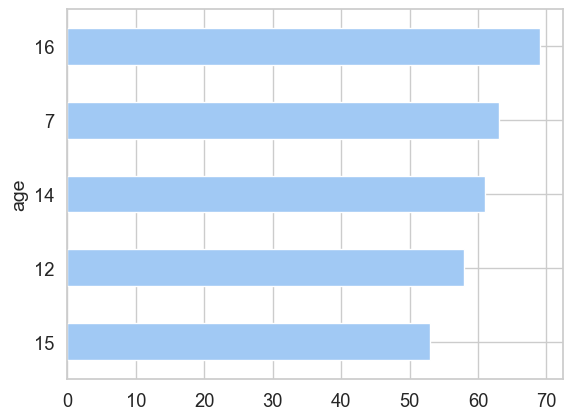

In [5]:
df["age"].value_counts()[:5].sort_values(ascending=True).plot(kind="barh")

Most common years we see here are 16 with about 65 values, followed by 7 and 14.

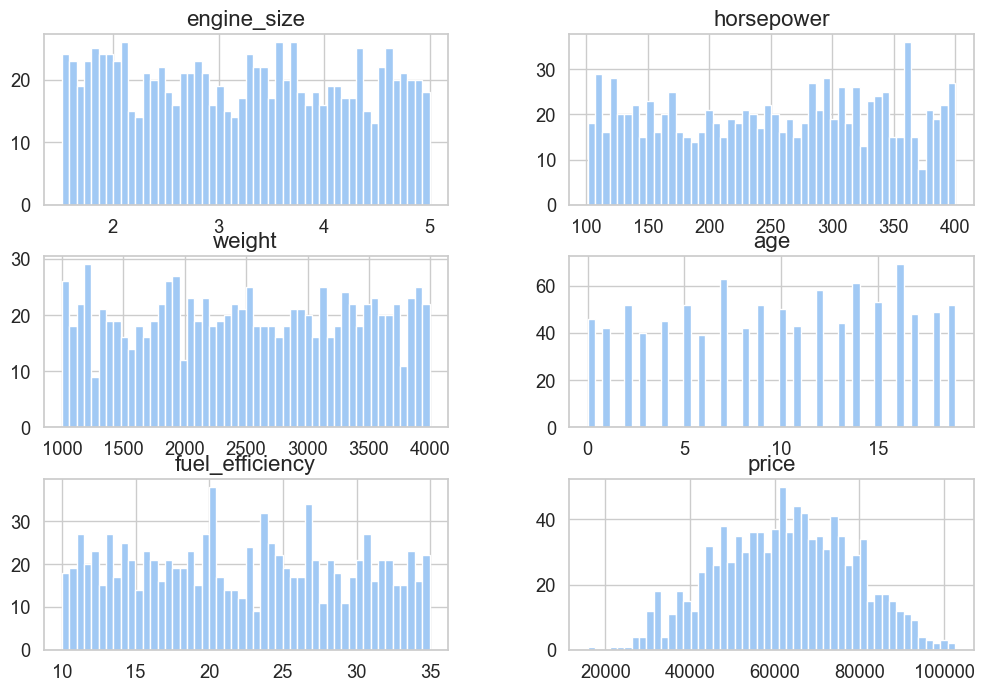

In [6]:
df.hist(bins=50, figsize=(12, 8));

Well as you can see most of our data is not very well distributed, yes the `price` has a good bell shaped distribution, but besides those nothing else. They are all boxy and don't follow the bell shaped design, let's fix that now.

In [7]:
# Define X (features) and y (target)
X = df.drop(columns=['price'])
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test)

(800, 200)

In [8]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize scalers for features (X) and target (y)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit the scalers on the training data only
scaler_X.fit(X_train)
scaler_y.fit(y_train.values.reshape(-1, 1))  # Reshape y for scaling

# Transform X_train, X_test, y_train, and y_test
X_train = pd.DataFrame(scaler_X.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler_X.transform(X_test), columns=X_test.columns)

# Transform y_train and y_test, keeping them as DataFrames
y_train = pd.DataFrame(scaler_y.transform(y_train.values.reshape(-1, 1)), columns=['price'])
y_test = pd.DataFrame(scaler_y.transform(y_test.values.reshape(-1, 1)), columns=['price'])

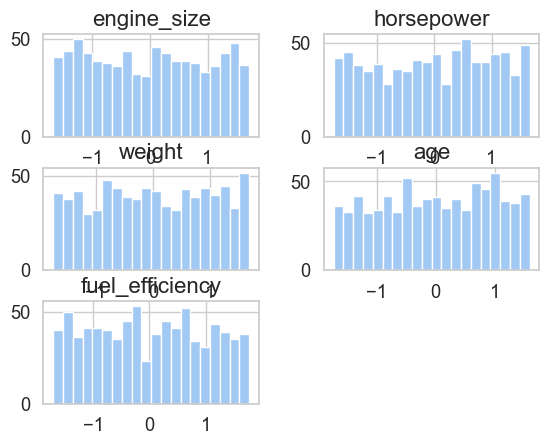

In [9]:
X_train.hist(bins=20);

## Creating the PyTorch model

In this section we will create a model in PyTorch, first and foremost, we will transform our dataframes to PyTorch tensors as PyTorch can onl understand tensors, not dataframes.

we can easily do that by using `torch.tensor()` function and just passing the dataframe values (items) and the dtype we want (optional).

In [10]:
# Coverting data to Torch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

# Convert X_test and y_test to PyTorch tensors
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

The `CarPredictionModel` is a simple neural network with two layers:

- **Layer 1**: A linear layer with 5 input features and 3 output features, followed by a **ReLU (Rectified Linear Unit)** activation function. ReLU introduces non-linearity to the model, which helps it learn complex patterns by allowing it to capture non-linear relationships between features. ReLU outputs the input directly if it's positive, otherwise, it outputs zero, making it efficient and commonly used in neural networks.

- **Layer 2**: A second linear layer with 3 input features and 1 output feature, providing the final prediction.

This structure allows the model to learn mappings from the 5 input features to the target variable through a non-linear transformation, which is particularly useful in regression tasks where relationships between features can be complex.


In [11]:
class CarPredictionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=5, out_features=3)
        self.layer2 = nn.Linear(in_features=3, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # Pass data through the first layer and apply an activation function (e.g., ReLU)
        x = self.layer1(x)
        x = torch.relu(x)
        # Pass data through the second layer
        x = self.layer2(x)
        return x

In [12]:
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = CarPredictionModel()

# Check out our parameters (initally these are random parameters generated by PyTorch itself, which it calibrates during training)
print(model_0.state_dict())

# Loss function (https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html)
loss_fn = nn.MSELoss()

# Setup optimizer (https://pytorch.org/docs/stable/generated/torch.optim.SGD.html)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

OrderedDict({'layer1.weight': tensor([[ 0.3419,  0.3712, -0.1048,  0.4108, -0.0980],
        [ 0.0902, -0.2177,  0.2626,  0.3942, -0.3281],
        [ 0.3887,  0.0837,  0.3304,  0.0606,  0.2156]]), 'layer1.bias': tensor([-0.0631,  0.3448,  0.0661]), 'layer2.weight': tensor([[-0.2695,  0.1472, -0.2660]]), 'layer2.bias': tensor([-0.0677])})


In [13]:
# Create the training loop
epochs = 100

# Values to keep track
epoch_counts = []
loss_values = []
test_loss_values = []

# Training loop
for epoch in range(epochs):
  epoch_counts.append(epoch)

  # Turn on train mode
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train_tensor)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train_tensor)

  # 3. Zero grad
  optimizer.zero_grad()

  # 4. Perform backpropogaion
  loss.backward()

  # 5. Gradient Descent
  optimizer.step()

  ### TESTING
  model_0.eval()

  with torch.inference_mode():
    # 1. Forward pass
    test_pred = model_0(X_test_tensor)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test_tensor)

    # Detach losses to store as simple values (without tracking gradients)
    loss_values.append(loss.detach().item())
    test_loss_values.append(test_loss.detach().item())

  # Print progress every 10 epochs
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss.item()} | Test loss: {test_loss.item()}")

Epoch: 0 | Loss: 1.257419466972351 | Test loss: 1.104552984237671
Epoch: 10 | Loss: 0.9868364930152893 | Test loss: 0.9483788013458252
Epoch: 20 | Loss: 0.8040168881416321 | Test loss: 0.7676981091499329
Epoch: 30 | Loss: 0.31808793544769287 | Test loss: 0.2940577268600464
Epoch: 40 | Loss: 0.1616547405719757 | Test loss: 0.15042124688625336
Epoch: 50 | Loss: 0.13745246827602386 | Test loss: 0.1301296353340149
Epoch: 60 | Loss: 0.12543895840644836 | Test loss: 0.12096545845270157
Epoch: 70 | Loss: 0.11854474991559982 | Test loss: 0.11583466827869415
Epoch: 80 | Loss: 0.11443135887384415 | Test loss: 0.11295010894536972
Epoch: 90 | Loss: 0.1120988056063652 | Test loss: 0.11106439679861069


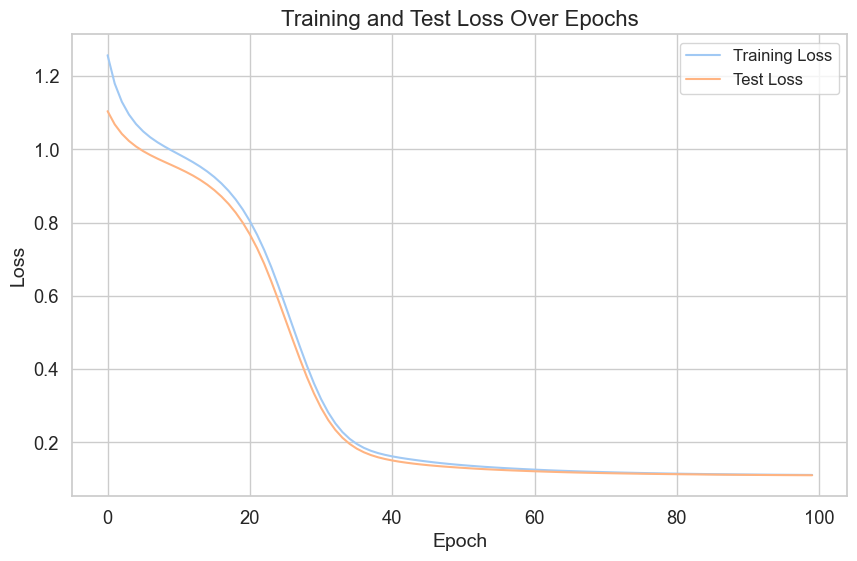

In [14]:
# Plot Train/Test Loss curves
plt.figure(figsize=(10, 6))

# Plot the training loss
plt.plot(epoch_counts, loss_values, label="Training Loss")

# Plot the test loss
plt.plot(epoch_counts, test_loss_values, label="Test Loss")

# X and y labels
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Title & legend
plt.title("Training and Test Loss Over Epochs")
plt.legend()
plt.show()

### Training and Test Loss Analysis

The plot above shows the training and test loss curves over 100 epochs. Here’s an interpretation of the results:

1. **Rapid Initial Decrease**:
   - Both the training and test loss decrease sharply within the first 20 epochs, indicating that the model quickly learns the general patterns in the data.

2. **Convergence**:
   - After about 40 epochs, both the training and test loss start to flatten out, reaching a point where further training brings only minor improvements. This suggests that the model is approaching its optimal capacity for this dataset.
   
3. **No Signs of Overfitting**:
   - The training and test loss curves are very close to each other, with only a small gap, which remains consistent. This indicates that the model is not overfitting; it generalizes well to the test data.
   - If overfitting were present, we would expect the training loss to continue decreasing while the test loss either stabilizes or starts increasing.

4. **Model Performance**:
   - Both losses reaching a low value and plateauing suggest that the model is well-trained and has achieved a balance between fitting the training data and generalizing to the test data.
   - The low and stable loss values indicate that the model is effectively capturing the patterns in the data without memorizing it.

### Conclusion:
This is an ideal scenario in training, where the model learns effectively without overfitting. No further regularization or early stopping adjustments appear necessary, although further tuning could be done if desired.


## Saving, Loading the Model & making custom predictions

Now we may have been done creating the model, what's the fun if you can't use your own inputs and save the model itself, well here we go!

In [15]:
MODEL_PATH = "car_prediction_model.pth"
torch.save(model_0.state_dict(), MODEL_PATH)
print(f"Model saved to {MODEL_PATH}")

Model saved to car_prediction_model.pth


In [16]:
# Re-create the model architecture
loaded_model = CarPredictionModel()

# Load the saved parameters
loaded_model.load_state_dict(torch.load(MODEL_PATH, weights_only=True))
loaded_model.eval()  # Set to evaluation mode
print("Model loaded successfully")

Model loaded successfully


In [17]:
# Example custom data (replace with actual values)
custom_data = pd.DataFrame({
    "engine_size": [2.0],        # Example values
    "horsepower": [150.0],
    "weight": [3000.0],
    "age": [5.0],
    "fuel_efficiency": [20.0]
})

# Transform the custom data using the scaler fitted on X_train
custom_data_transformed = scaler_X.transform(custom_data)

# Convert transformed data to a PyTorch tensor
custom_data_tensor = torch.tensor(custom_data_transformed, dtype=torch.float32)


# Predict using the loaded model
loaded_model.eval()  # Set to evaluation mode
with torch.inference_mode():
    prediction_transformed = loaded_model(custom_data_tensor)

In [18]:
# Convert prediction to NumPy and reverse the scaling
prediction_original_scale = scaler_y.inverse_transform(prediction_transformed.numpy())

# Print the final prediction
print(f"Predicted car price (original scale): {prediction_original_scale[0][0]}")

Predicted car price (original scale): 42131.6796875
